In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from numpy import median
import seaborn as sns
from matplotlib import style
style.use('ggplot')
plt.rcParams["figure.figsize"] = [8,5]

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [60]:
train_data.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,Month,Year,AgeOfFlat,Flat Age Group
0,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,159000.0,1,2000,42,41-50
1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,167000.0,1,2000,42,41-50
2,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,163000.0,1,2000,42,41-50
3,ANG MO KIO,4 ROOM,304,ANG MO KIO AVE 1,04 TO 06,97.0,New Generation,260000.0,1,2000,41,41-50
4,ANG MO KIO,5 ROOM,221,ANG MO KIO AVE 1,10 TO 12,127.0,Improved,408000.0,1,2000,25,21-30


In [61]:
test_data.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,Month,Year,AgeOfFlat,Flat Age Group
0,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,07 TO 09,44.0,Improved,1,2014,38,31-40
1,ANG MO KIO,3 ROOM,603,ANG MO KIO AVE 5,07 TO 09,67.0,New Generation,1,2014,38,31-40
2,ANG MO KIO,3 ROOM,476,ANG MO KIO AVE 10,04 TO 06,67.0,New Generation,1,2014,39,31-40
3,ANG MO KIO,3 ROOM,558,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1,2014,38,31-40
4,ANG MO KIO,3 ROOM,605,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1,2014,38,31-40


In [3]:
del train_data['iD']
del test_data['iD']

In [4]:
train_data['Month'] = pd.DatetimeIndex(train_data['month']).month
test_data['Month'] = pd.DatetimeIndex(test_data['month']).month

In [5]:
train_data['Year'] = pd.DatetimeIndex(train_data['month']).year
test_data['Year'] = pd.DatetimeIndex(test_data['month']).year

In [6]:
train_data['AgeOfFlat'] = 2018 - train_data['lease_commence_date']
test_data['AgeOfFlat'] = 2018 - test_data['lease_commence_date']

In [7]:
del train_data['month']
del train_data['lease_commence_date']

del test_data['month']
del test_data['lease_commence_date']

In [8]:
print('Towns: ', train_data['town'].unique())
print('Flat Type: ', train_data['flat_type'].unique())
print('Block: ', train_data['block'].unique())
# print('Street Name: ', train_data['street_name'].unique())
print('Flat Model: ', train_data['flat_model'].unique())
print('Storey Range: ', train_data['storey_range'].unique())

Towns:  ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH'
 'WOODLANDS' 'YISHUN' 'SEMBAWANG' 'PUNGGOL']
Flat Type:  ['3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '2 ROOM' 'MULTI-GENERATION'
 '1 ROOM']
Block:  ['216' '215' '218' ..., '338A' '28A' '18A']
Flat Model:  ['New Generation' 'Improved' 'Model A' 'Standard' 'Apartment'
 'Model A-Maisonette' 'Maisonette' 'Simplified' 'Multi Generation'
 'Adjoined flat' 'Premium Apartment' 'Terrace' 'Improved-Maisonette'
 'Premium Maisonette' '2-room' 'Model A2']
Storey Range:  ['07 TO 09' '04 TO 06' '10 TO 12' '13 TO 15' '01 TO 03' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '40 TO 42'
 '37 TO 39' '34 TO 36' '06 TO 10' '01 TO 05' '11 TO 15' '16 TO 20'
 '21 TO 25' '26 TO 30' '36 TO 40' '31 TO 35']


In [10]:
len(train_data['town'].unique())

26

In [11]:
len(train_data['storey_range'].unique())

22

In [12]:
len(train_data['flat_model'].unique())

16

In [13]:
sns.regplot(x='floor_area_sqm', y='resale_price', data=train_data)

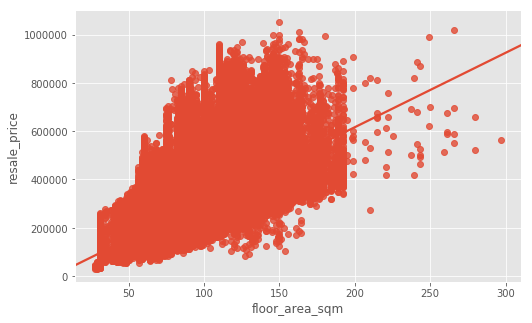

In [14]:
plt.show()

In [15]:
np.sort(train_data['AgeOfFlat'].unique())

array([ 6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], dtype=int64)

In [9]:
label = ['Less than 10','11-20','21-30','31-40','41-50','Above 50']
train_data['Flat Age Group'] = pd.cut(train_data['AgeOfFlat'], [0,10,20,30,40,50,60], labels=label)
test_data['Flat Age Group'] = pd.cut(test_data['AgeOfFlat'], [0,10,20,30,40,50,60], labels=label)

In [10]:
len(np.sort(train_data['block'].unique()))

2031

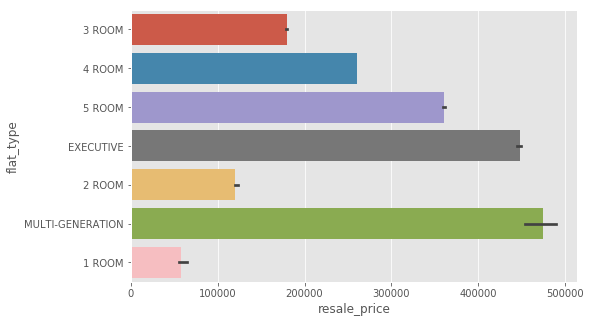

In [18]:
sns.barplot(x='resale_price', y='flat_type', data=train_data, estimator=median, orient='h')
plt.show()

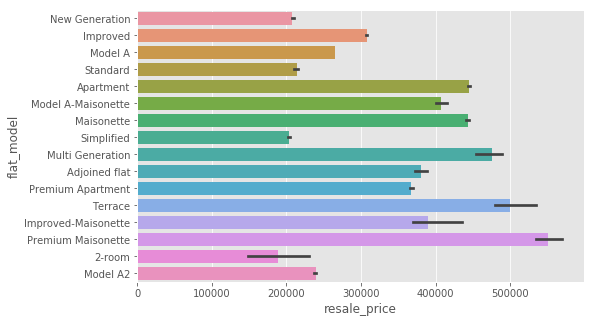

In [19]:
sns.barplot(x='resale_price', y='flat_model', data=train_data, estimator=median, orient='h')
plt.show()

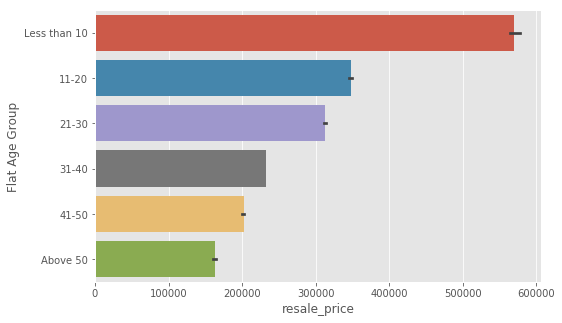

In [20]:
sns.barplot(x='resale_price', y='Flat Age Group', data=train_data, estimator=median, orient='h')
plt.show()

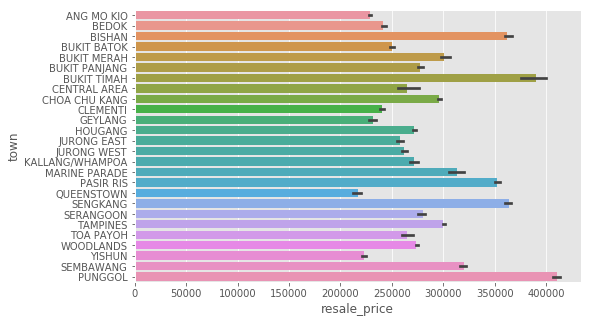

In [21]:
sns.barplot(x='resale_price', y='town', data=train_data, estimator=median, orient='h')
plt.show()

In [11]:
test_data.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,Month,Year,AgeOfFlat,Flat Age Group
0,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,07 TO 09,44.0,Improved,1,2014,38,31-40
1,ANG MO KIO,3 ROOM,603,ANG MO KIO AVE 5,07 TO 09,67.0,New Generation,1,2014,38,31-40
2,ANG MO KIO,3 ROOM,476,ANG MO KIO AVE 10,04 TO 06,67.0,New Generation,1,2014,39,31-40
3,ANG MO KIO,3 ROOM,558,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1,2014,38,31-40
4,ANG MO KIO,3 ROOM,605,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1,2014,38,31-40


In [12]:
X = train_data.iloc[:,[0,1,4,5,6,8,9,10,11]].values
y = train_data.iloc[:,7].values
X_test = test_data.iloc[:,[0,1,4,5,6,7,8,9,10]].values

In [13]:
X[0]

array(['ANG MO KIO', '3 ROOM', '07 TO 09', 73.0, 'New Generation', 1, 2000,
       42, '41-50'], dtype=object)

In [14]:
encoder = LabelEncoder()

index_list = [0,1,2,4,8]
for index in index_list:
    X[:,index] = encoder.fit_transform(X[:,index])
    
for index in index_list:
    X_test[:,index] = encoder.fit_transform(X_test[:,index])


In [25]:
# hotencoder = OneHotEncoder(categorical_features=[[0,1,2,4,8]])
# X = hotencoder.fit_transform(X).toarray()

In [15]:
len(X[0])

9

In [27]:
# # Dummy var trap
# np.delete(X, [0,27,34,56,79], 1)


In [16]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.1)

In [33]:
# Using random forest

In [38]:
rfr = RandomForestRegressor(n_estimators=35, max_depth=15)

rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
pred = rfr.predict(X_validate)
predTrain = rfr.predict(X_train)

In [40]:
metrics.mean_squared_error(y_validate, pred)

733755341.12777591

In [41]:
np.sqrt(metrics.mean_squared_error(y_validate, pred))

27087.918730086589

In [42]:
np.sqrt(metrics.mean_squared_error(y_train, predTrain))

24882.057026479306

In [43]:
predtest = rfr.predict(X_test)

In [44]:
predicatedvalues = pd.DataFrame(predtest)

In [45]:
predicatedvalues.head()

,0
0,281416.923605
1,343389.886377
2,342569.891779
3,341410.146540
4,341410.146540


In [47]:
predicatedvalues.to_csv('results2.csv',sep=',')